In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Amplitude Shift

In [126]:
root_folder = "to_evaluate"
exp_type = "amplitude_shift"
simple_metric_filename = "simple_metric_results.xlsx"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{nb+1:0.1f}_{nb+1:0.1f}" for nb in range(10)]
folder_names.remove("3.0_3.0")
folder_names.remove("5.0_5.0")

ampl_labels = ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"]

In [127]:
folder_names

['1.0_1.0',
 '2.0_2.0',
 '4.0_4.0',
 '6.0_6.0',
 '7.0_7.0',
 '8.0_8.0',
 '9.0_9.0',
 '10.0_10.0']

In [128]:
def extract_results(exp_names:list, _exp_type:str, _root_folder:str=root_folder):
    idxs = list(itertools.product(exp_names, [0,1,2,3,4,5,6]))
    multi_index = pd.MultiIndex.from_tuples(idxs)
    _df_data = []

    for exp_name in exp_names:
        filepath = f"{_root_folder}/{_exp_type}/{exp_name}/{simple_metric_filename}"
        _df = pd.read_excel(filepath)
        _df = _df.drop(columns=["Unnamed: 0"])
        _df_values = _df.values
        _df_data.append(_df_values)

    _df_data = np.array(_df_data).reshape(-1, _df_values.shape[-1])
    return pd.DataFrame(data=_df_data, index=multi_index, columns=_df.columns)

amplitude_exp_values = extract_results(folder_names, exp_type)

In [129]:
def plot_label_result(
        _df:pd.DataFrame, 
        n_signal:int, 
        exp_types:list, 
        plot_labels:list, 
        title="a wonderfull title", xlabel="a marvelous x label", ylabel="an astonishing y label!"):
    
    idx = list(itertools.product(exp_types, [n_signal]))

    plt.figure(figsize=(18, 5))
    ax = plt.subplot(111)
    _df.loc[idx][plot_labels].plot(ax=ax, style=".-")

    ax.grid(True)
    ax.set_title(f"{title} on senssor {n_signal}.")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
# for i in range(7):
#     plot_label_result(amplitude_exp_values, i, folder_names, ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"])


In [130]:
# 
# title="a wonderfull title", xlabel="a marvelous x label", ylabel="an astonishing y label!"

def aggretate_results(
        df:pd.DataFrame, 
        sensor_to_use=[0,1,2,3,4,5]):
    
    idx = list(itertools.product(folder_names, sensor_to_use))

    return df.loc[idx].reset_index(0).groupby("level_0").mean()


def plot_results(
        df:pd.DataFrame,
        label_to_plot:list,
        title="A wonderfull title", 
        xlabel="A marvelous x label", 
        ylabel="An astonishing y label!",
        content_line=0,
        content_label="",
        style1_line=0, style1_label=""
        ):
    
    plt.figure(figsize=(18, 10))
    ax = plt.subplot(111)

    df[label_to_plot].plot(ax=ax, style=".-")

    plt.axvline(x=content_line, color='k', linestyle="--", label=content_label)
    plt.axvline(x=style1_line, color='b', linestyle="--", label=style1_label)

    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    final_legend = list(label_to_plot)
    final_legend.extend([content_label, style1_label])

    ax.legend(final_legend)


agreggated_results = aggretate_results(amplitude_exp_values)

In [131]:
agreggated_results.index = agreggated_results.index.str.split("_").map(lambda i: float(i[0]))

In [132]:
agreggated_results = agreggated_results.sort_index() 

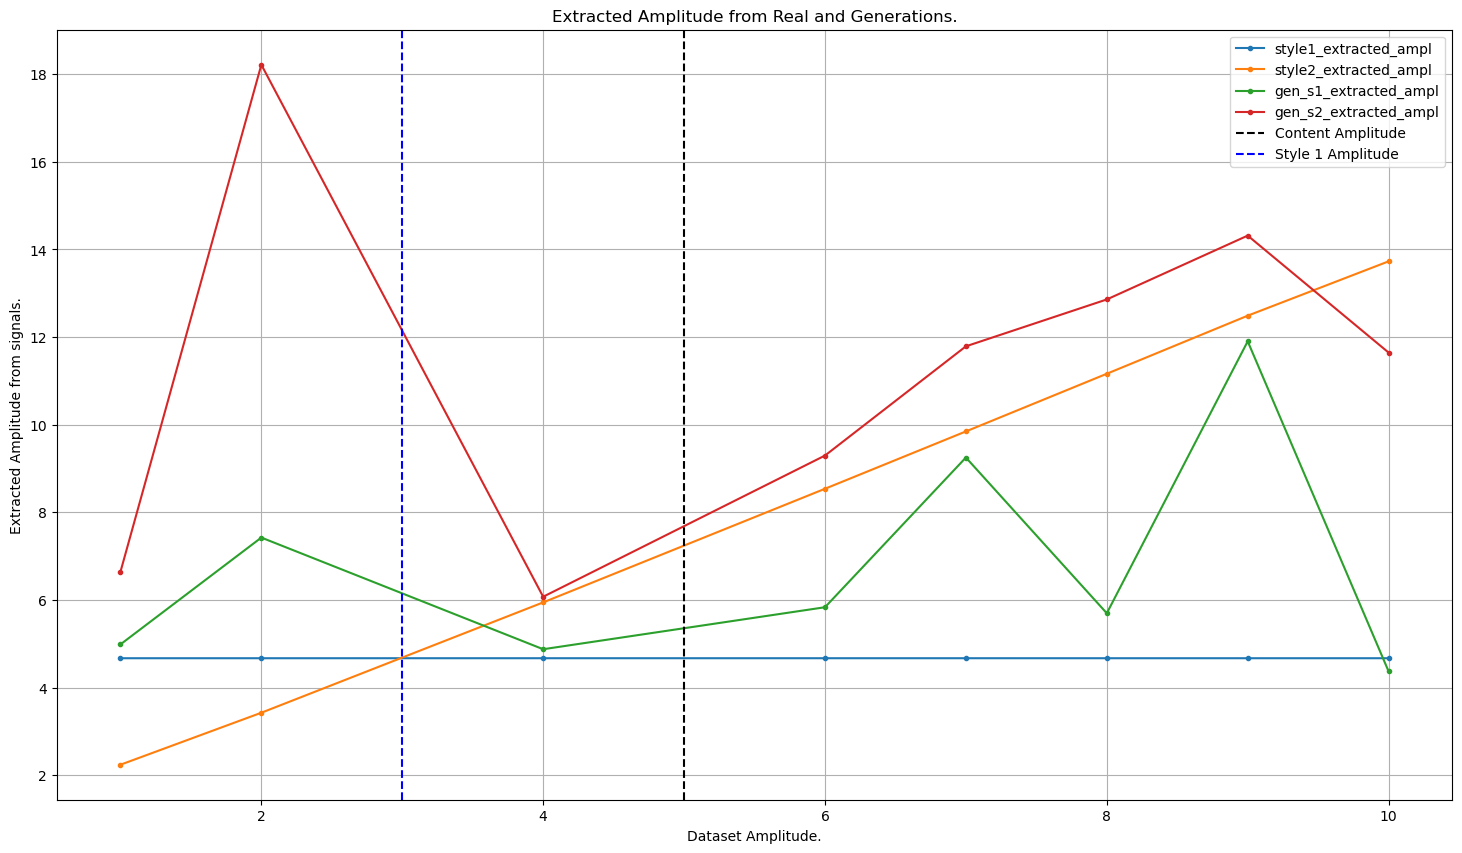

In [133]:
plot_results(
    agreggated_results, 
    ampl_labels, 
    title="Extracted Amplitude from Real and Generations.",
    xlabel="Dataset Amplitude.",
    ylabel="Extracted Amplitude from signals.",
    content_line=5, content_label="Content Amplitude",
    style1_line=3, style1_label='Style 1 Amplitude')

## Output Noise

In [134]:
exp_type = "output_noise"
simple_metric_filename = "simple_metric_results.xlsx"
style_1_amplitude = "0.50"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{0.25* (nb+1):0.2f}" for nb in range(10)]
# folder_names.remove(style_1_amplitude)

on_labels = ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"]

In [135]:
outpout_noise_df = extract_results(folder_names, exp_type)

In [ ]:
# for i in range(7):
#     plot_label_result(outpout_noise_df, i, folder_names, ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"])

In [113]:
agg_out_noise_result = aggretate_results(outpout_noise_df)

plot_results(
    agg_out_noise_result, 
    on_labels, 
    title="Extracted Noise from Real and Generations.",
    xlabel="Dataset Noise",
    ylabel="Extracted Noise from signal.",
    content_line=0, content_label="Content Noise.",
    style1_line=0.5, style1_label='Style 1 Amplitude')

NameError: name 'outpout_noise_df' is not defined

## Time Shift

In [27]:
exp_type = "time_shift"
simple_metric_filename = "simple_metric_results.xlsx"
style_1_amplitude = "0"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{nb*2:0.0f}" for nb in range(1, 10)]

ts_labels = ["real_s1_shifts", "real_s2_shifts", "fake_s1_shifts", "fake_s2_shifts"]

In [28]:
time_shift_results = extract_results(folder_names, exp_type)

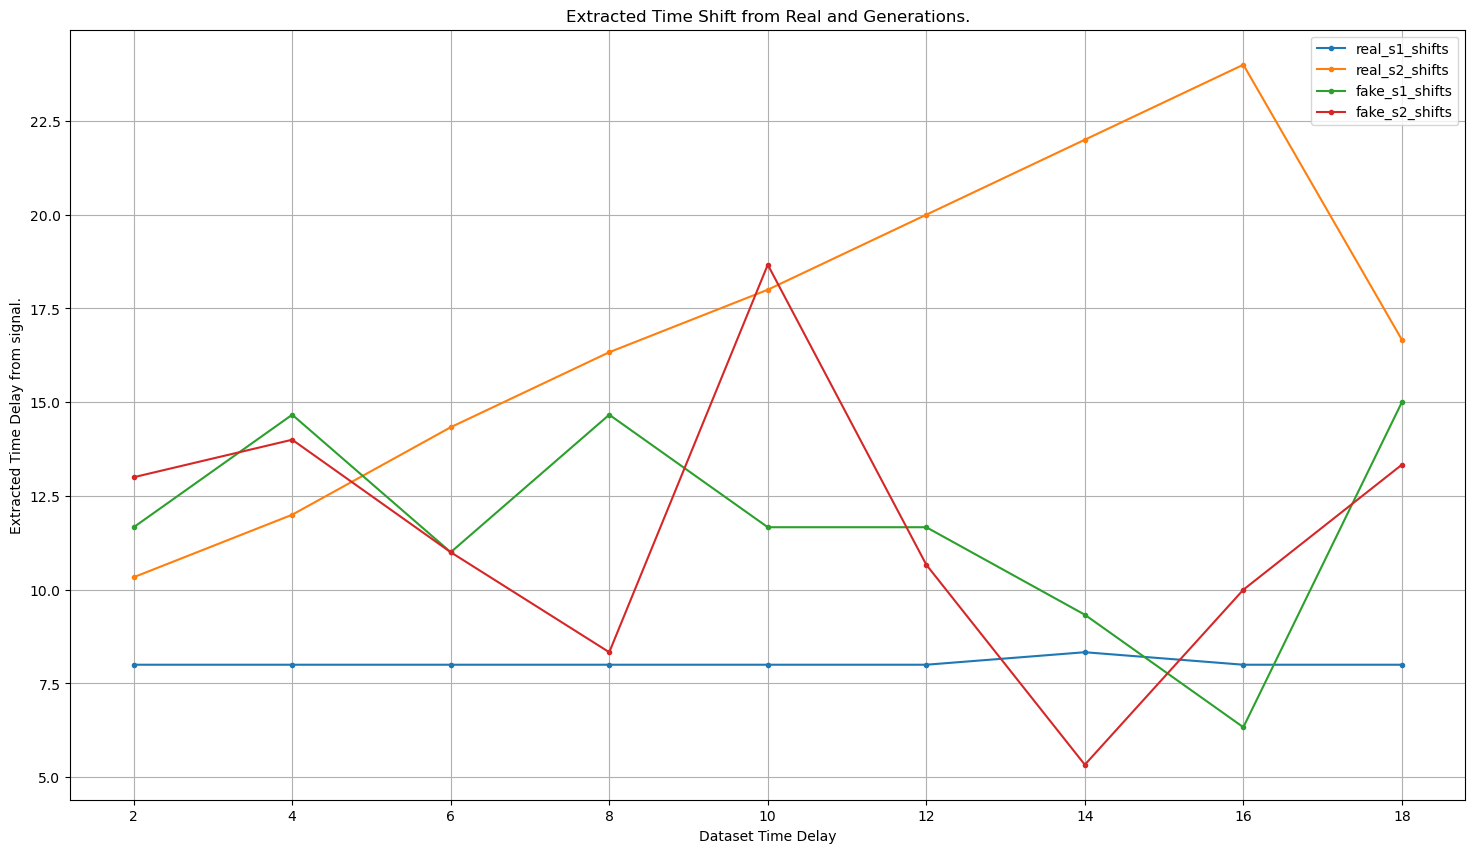

In [30]:
agg_ts_results = aggretate_results(time_shift_results, [2, 3, 4])
agg_ts_results.index = agg_ts_results.index.astype(int)
agg_ts_results = agg_ts_results.sort_index()

plot_results(
    agg_ts_results, 
    ts_labels,
    title="Extracted Time Shift from Real and Generations.",
    xlabel="Dataset Time Delay",
    ylabel="Extracted Time Delay from signal."
    )